In [1]:
import pandas as pd

# 读取数据
df = pd.read_csv("cleaned_tweets.csv")

# 数据基本信息
print(df.info())
print(df.describe(include='all'))
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87358 entries, 0 to 87357
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              87358 non-null  object
 1   twitterUrl       87358 non-null  object
 2   id               87358 non-null  int64 
 3   text             87358 non-null  object
 4   retweetCount     87358 non-null  int64 
 5   replyCount       87358 non-null  int64 
 6   likeCount        87358 non-null  int64 
 7   quoteCount       87358 non-null  int64 
 8   createdAt        87358 non-null  object
 9   bookmarkCount    87358 non-null  int64 
 10  isRetweet        87358 non-null  bool  
 11  isQuote          87358 non-null  bool  
 12  location         60080 non-null  object
 13  full_text_lower  87358 non-null  object
 14  stopword         87358 non-null  object
 15  full_text_clean  87358 non-null  object
 16  punct_token      87358 non-null  object
 17  lemma            87310 non-null

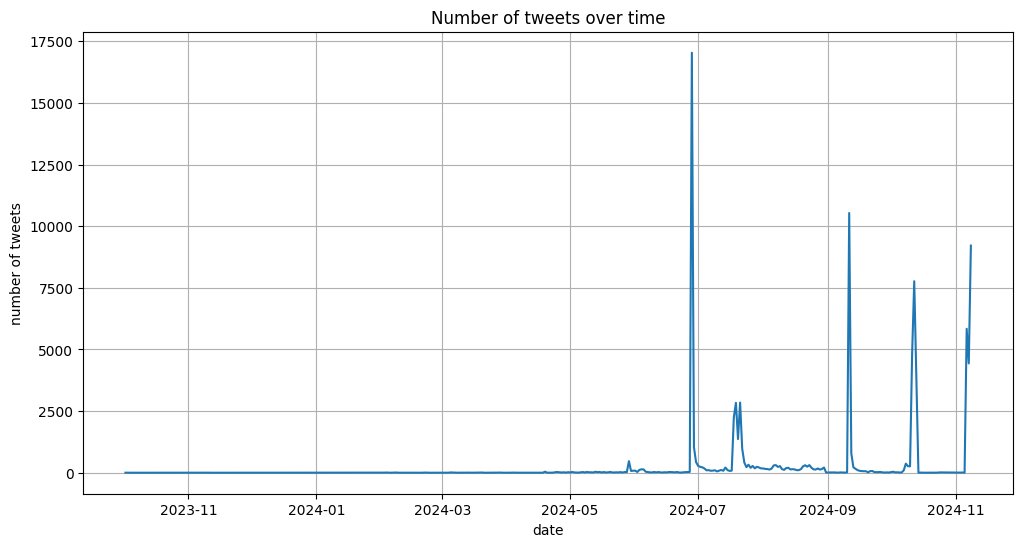

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 转换为日期时间格式
df['createdAt'] = pd.to_datetime(df['createdAt'])

# 按日期统计推文数量
df['date'] = df['createdAt'].dt.date
date_counts = df['date'].value_counts().sort_index()

# 绘制时间分布图
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line')
plt.title('Number of tweets over time')
plt.xlabel('date')
plt.ylabel('number of tweets')
plt.grid()
plt.show()


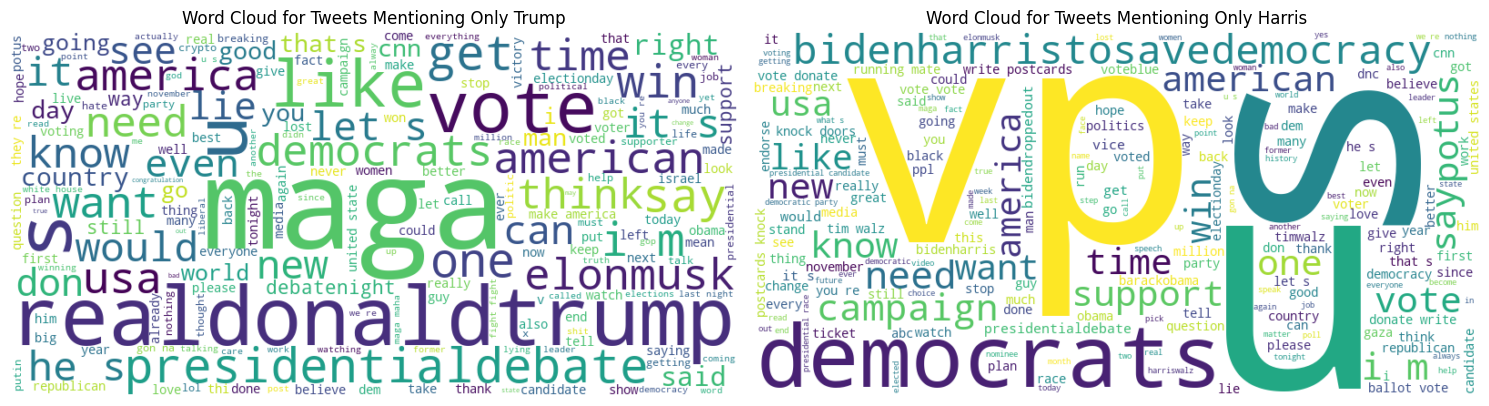

In [10]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

only_trump_tweets = df[(df['text'].str.contains('Trump', case=False)) & (~df['text'].str.contains('Harris', case=False))]
only_harris_tweets = df[(df['text'].str.contains('Harris', case=False)) & (~df['text'].str.contains('Trump', case=False))]

trump_text = ' '.join(only_trump_tweets['full_text_clean'].dropna().tolist())
harris_text = ' '.join(only_harris_tweets['full_text_clean'].dropna().tolist())

# 清洗文本函数
def clean_text(text):
    text = re.sub(r'http\S+|https\S+', '', text)  # 移除URL
    text = re.sub(r'\bamp\b', '', text)  # 移除"amp"
    text = re.sub(r'[^\w\s]', '', text)  # 移除标点符号
    return text

# 清洗两组文本
trump_text_cleaned = clean_text(trump_text)
harris_text_cleaned = clean_text(harris_text)

# 生成词云
trump_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=['rt', 'co', 't','trump','harris','kamala','donald','biden','donaldtrump','kamalaharris','president','joebiden','election','uselection','democrat','uselections','debate','people','joe']  # 添加停用词
).generate(trump_text_cleaned)

harris_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=['rt', 'co', 't','harris','trump','kamala','donald','biden','donaldtrump','kamalaharris','president','joebiden','election','uselection','democrat','uselections','debate','people','joe']  # 添加停用词
).generate(harris_text_cleaned)

# 绘制词云对比图
plt.figure(figsize=(15, 10))

# 川普词云
plt.subplot(1, 2, 1)
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Tweets Mentioning Only Trump')
plt.axis('off')

# 哈里斯词云
plt.subplot(1, 2, 2)
plt.imshow(harris_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Tweets Mentioning Only Harris')
plt.axis('off')

# 显示对比图
plt.tight_layout()
plt.show()


In [63]:
pip install matplotlib-venn


Looking in indexes: https://pypi.doubanio.com/simple
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45338 sha256=29cc8484302681b914e43ff924548fdcbedb789af174ded385d59af93d944aa2
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\31\0a\11\4ca9862c9262f97e17fad7151540ad2b5348a9de531585be4a
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


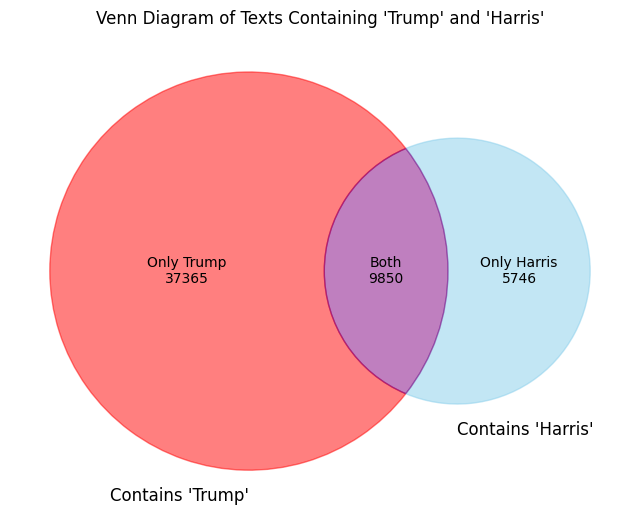

In [74]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# 示例数据：计算文本中包含 "Trump" 和 "Harris" 的数量
contains_trump = df[df["text"].str.contains("Trump", case=False, na=False)]
contains_harris = df[df["text"].str.contains("Harris", case=False, na=False)]

# 各集合的数量
trump_count = len(contains_trump)
harris_count = len(contains_harris)
both_count = len(contains_trump[contains_trump["text"].str.contains("Harris", case=False, na=False)])

# 绘制 Venn 图
plt.figure(figsize=(8, 8))
venn = venn2(
    subsets=(trump_count, harris_count, both_count),
    set_labels=("Contains 'Trump'", "Contains 'Harris'"),
)
# 修改颜色
venn.get_patch_by_id("10").set_color("#FF0000")  
venn.get_patch_by_id("01").set_color("#87CEEB")  
venn.get_patch_by_id("11").set_color("#800080")  

# 设置透明度以更好区分重叠区域
for patch in venn.patches:
    if patch is not None:
        patch.set_alpha(0.5)  

# 标注具体数量
venn.get_label_by_id("10").set_text(f"Only Trump\n{trump_count - both_count}")
venn.get_label_by_id("01").set_text(f"Only Harris\n{harris_count - both_count}")
venn.get_label_by_id("11").set_text(f"Both\n{both_count}")

# 添加标题
plt.title("Venn Diagram of Texts Containing 'Trump' and 'Harris'")
plt.show()


d:\python3\envs\is6750\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


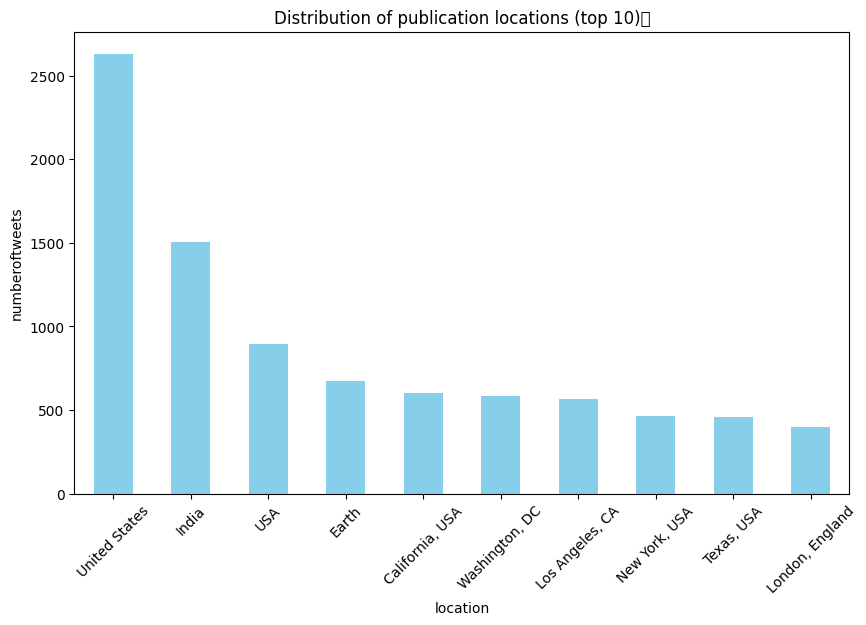

In [9]:
# 地点统计
location_counts = df['location'].value_counts().head(10)

# 绘制柱状图
location_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of publication locations (top 10)）')
plt.xlabel('location')
plt.ylabel('numberoftweets')
plt.xticks(rotation=45)
plt.show()


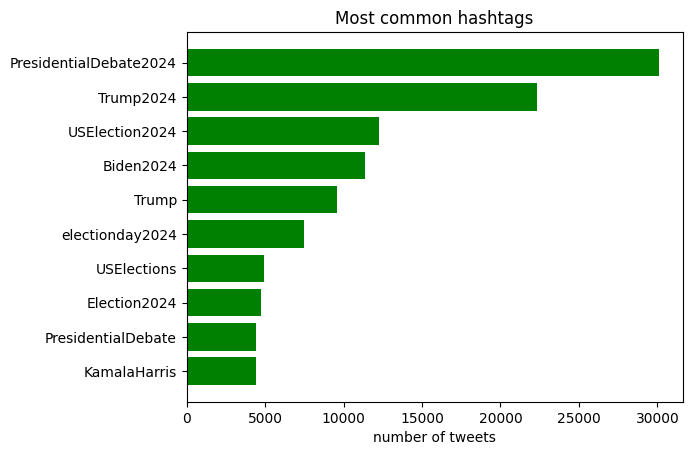

In [10]:
import re
from collections import Counter

# 提取话题标签
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

df['hashtags'] = df['text'].apply(extract_hashtags)
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]

# 统计最常见的话题标签
hashtag_counts = Counter(all_hashtags).most_common(10)

# 绘制
hashtags, counts = zip(*hashtag_counts)
plt.barh(hashtags, counts, color='green')
plt.xlabel('number of tweets')
plt.title('Most common hashtags')
plt.gca().invert_yaxis()
plt.show()


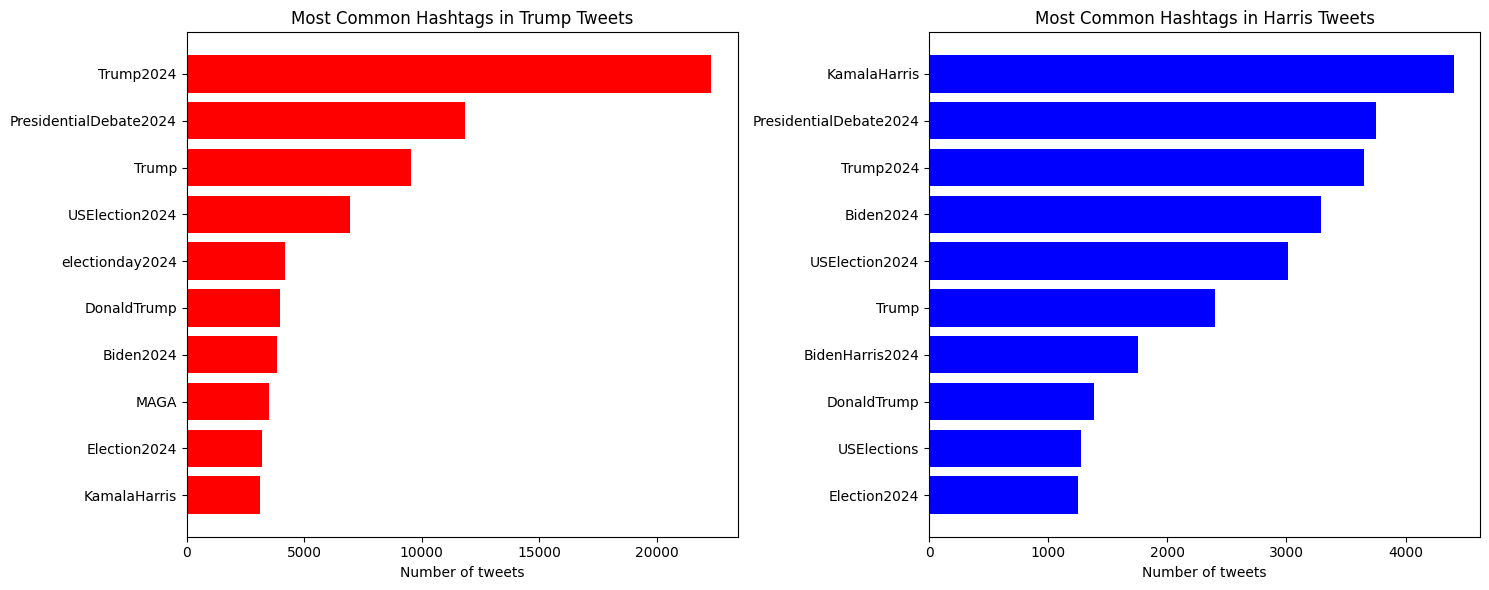

In [12]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# 提取话题标签函数
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# 提取并存储话题标签
df['hashtags'] = df['text'].apply(extract_hashtags)

# 分离提到川普和提到哈里斯的推文
trump_tweets = df[df['text'].str.contains('Trump', case=False)]
harris_tweets = df[df['text'].str.contains('Harris', case=False)]

# 获取川普和哈里斯推文中的所有话题标签
trump_hashtags = [hashtag for hashtags in trump_tweets['hashtags'] for hashtag in hashtags]
harris_hashtags = [hashtag for hashtags in harris_tweets['hashtags'] for hashtag in hashtags]

# 统计最常见的话题标签
trump_hashtag_counts = Counter(trump_hashtags).most_common(10)
harris_hashtag_counts = Counter(harris_hashtags).most_common(10)

# 解包标签和计数
trump_hashtags, trump_counts = zip(*trump_hashtag_counts) if trump_hashtag_counts else ([], [])
harris_hashtags, harris_counts = zip(*harris_hashtag_counts) if harris_hashtag_counts else ([], [])

# 绘制图表
plt.figure(figsize=(15, 6))

# 川普推文的图表
plt.subplot(1, 2, 1)
plt.barh(trump_hashtags, trump_counts, color='red')
plt.xlabel('Number of tweets')
plt.title('Most Common Hashtags in Trump Tweets')
plt.gca().invert_yaxis()

# 哈里斯推文的图表
plt.subplot(1, 2, 2)
plt.barh(harris_hashtags, harris_counts, color='blue')
plt.xlabel('Number of tweets')
plt.title('Most Common Hashtags in Harris Tweets')
plt.gca().invert_yaxis()

# 调整布局
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 读取数据
df = pd.read_csv('cleaned_tweets.csv')

# 清理文本
def clean_text(text):
    text = re.sub(r'http\S+|https\S+', '', text)  # 移除URL
    text = re.sub(r'\bamp\b', '', text)  # 移除"amp"
    text = re.sub(r'[^\w\s]', '', text)  # 移除标点符号
    text = re.sub(r'\d+', '', text)  # 移除数字
    return text

df['cleaned_text'] = df['full_text_clean'].dropna().apply(clean_text)

# 停用词列表
stop_words = ['rt', 'co', 't', 'amp','http','https']  # 根据需要扩展此列表

# TF-IDF 向量化
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    max_df=0.95,  # 忽略在 95% 文本中出现的词
    min_df=2,     # 至少出现在 2 篇文档中的词
    max_features=1000  # 限制特征数量
)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# NMF 模型训练
n_topics = 5  # 设置主题数量，可调整
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 提取主题关键词
def get_topics(model, feature_names, n_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topic {idx + 1}: {', '.join(keywords)}")
    return topics

# 获取特征名称和主题
tfidf_feature_names = vectorizer.get_feature_names_out()
topics = get_topics(nmf_model, tfidf_feature_names)

# 打印主题
for topic in topics:
    print(topic)


Topic 1: trump, donald, maga, electionday, donaldtrump, president, elonmusk, victory, win, usa
Topic 2: biden, joe, president, joebiden, democrats, race, uselections, bidendroppedout, potus, cnn
Topic 3: kamalaharris, kamala, harris, uselections, donaldtrump, us, election, joebiden, presidential, president
Topic 4: debate, presidentialdebate, debatenight, presidential, cnn, tonight, night, last, watching, abc
Topic 5: vote, america, realdonaldtrump, it, maga, people, president, like, get, let


In [13]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 定义川普和哈里斯的关键词和话题标签
trump_keywords = ["trump", "donald trump", "maga", "trump2024", "make america great again", "donald j trump"]
trump_hashtags = ["#Trump2024", "#MakeAmericaGreatAgain", "#VoteTrump", "#TrumpElection", "#TrumpBidenDebate"]

harris_keywords = ["kamala", "kamala harris", "vp harris", "vice president harris"]
harris_hashtags = ["#KamalaHarris", "#Harris2024", "#VoteHarris", "#KamalaVP", "#HarrisElection"]

# 读取数据
df = pd.read_csv('cleaned_tweets.csv')

# 清理文本
def clean_text(text):
    text = re.sub(r'http\S+|https\S+', '', text)  # 移除URL
    text = re.sub(r'\bamp\b', '', text)  # 移除"amp"
    text = re.sub(r'[^\w\s]', '', text)  # 移除标点符号
    text = re.sub(r'\d+', '', text)  # 移除数字
    return text

df['cleaned_text'] = df['full_text_clean'].dropna().apply(clean_text)

# 筛选出只提到川普的推文
trump_tweets = df[df['cleaned_text'].str.contains('|'.join(trump_keywords + trump_hashtags), case=False, na=False)]

# 筛选出只提到哈里斯的推文
harris_tweets = df[df['cleaned_text'].str.contains('|'.join(harris_keywords + harris_hashtags), case=False, na=False)]

# 找出交叉推文（同时提到川普和哈里斯的推文）
cross_tweets = trump_tweets[trump_tweets['cleaned_text'].str.contains('|'.join(harris_keywords + harris_hashtags), case=False, na=False)]

# 移除交叉推文
trump_tweets = trump_tweets[~trump_tweets.index.isin(cross_tweets.index)]
harris_tweets = harris_tweets[~harris_tweets.index.isin(cross_tweets.index)]

# 使用TF-IDF向量化
stop_words = ['rt', 'co', 't', 'amp', 'http', 'https']  # 根据需要扩展此列表
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    max_df=0.95,  # 忽略在95%文本中出现的词
    min_df=2,     # 至少出现在2篇文档中的词
    max_features=1000  # 限制特征数量
)

# 为川普推文创建TF-IDF矩阵
tfidf_matrix_trump = vectorizer.fit_transform(trump_tweets['cleaned_text'])

# 为哈里斯推文创建TF-IDF矩阵
tfidf_matrix_harris = vectorizer.transform(harris_tweets['cleaned_text'])

# 设置NMF模型
n_topics = 5  # 设置主题数量，可以根据需要调整
nmf_model_trump = NMF(n_components=n_topics, random_state=42)
nmf_model_harris = NMF(n_components=n_topics, random_state=42)

# 训练NMF模型
nmf_model_trump.fit(tfidf_matrix_trump)
nmf_model_harris.fit(tfidf_matrix_harris)

# 提取主题关键词
def get_topics(model, feature_names, n_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topic {idx + 1}: {', '.join(keywords)}")
    return topics

# 获取特征名称和主题
tfidf_feature_names = vectorizer.get_feature_names_out()

# 获取川普推文的主题
topics_trump = get_topics(nmf_model_trump, tfidf_feature_names)

# 获取哈里斯推文的主题
topics_harris = get_topics(nmf_model_harris, tfidf_feature_names)

# 打印川普推文的主题
print("Trump Tweets Topics:")
for topic in topics_trump:
    print(topic)

# 打印哈里斯推文的主题
print("\nHarris Tweets Topics:")
for topic in topics_harris:
    print(topic)


Trump Tweets Topics:
Topic 1: trump, donald, harris, people, electionday, win, vote, election, like, let
Topic 2: realdonaldtrump, elonmusk, america, vote, congratulations, make, back, great, president, jdvance
Topic 3: biden, debate, presidentialdebate, joe, debatenight, presidential, cnn, joebiden, democrats, like
Topic 4: maga, america, maha, make, follow, great, vote, let, patriots, democrats
Topic 5: donaldtrump, president, uselections, donald, us, joebiden, election, usa, presidential, former

Harris Tweets Topics:
Topic 1: harris, walz, biden, debate, uselections, campaign, vote, presidentialdebate, obama, political
Topic 2: president, vice, democratic, uselections, us, presidential, biden, joebiden, candidate, nominee
Topic 3: vp, joebiden, potus, presidentialdebate, pick, now, we, right, thedemocrats, it
Topic 4: barackobama, vote, black, obama, it, people, america, like, democrats, years
Topic 5: running, you, re, walz, me, biden, joe, we, bidendroppedout, presidentialdebate


In [ ]:
df.head(5)

,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,isRetweet,isQuote,location,full_text_lower,stopword,full_text_clean,punct_token,lemma,cleaned_text
0,https://x.com/heyreb2020/status/18550272497091...,https://twitter.com/heyreb2020/status/18550272...,1855027249709191424,President @realDonaldTrump should do exactly w...,0,0,1,0,Fri Nov 08 23:18:55 +0000 2024,0,False,False,"Whitney, NV",president @realdonaldtrump should do exactly w...,president @realdonaldtrump exactly @thedemocra...,"['president', 'realdonaldtrump', 'exactly', 't...","['president', 'realdonaldtrump', 'exactly', 't...",president realdonaldtrump exactly thedemocrats...,president realdonaldtrump exactly thedemocrats...
1,https://x.com/BookofJahJah/status/185502312813...,https://twitter.com/BookofJahJah/status/185502...,1855023128130523392,One last grasp to insert Kamala somewhere huh ...,0,0,0,0,Fri Nov 08 23:02:33 +0000 2024,0,False,True,Where The Air Gets Cold,one last grasp to insert kamala somewhere huh ...,one last grasp insert kamala somewhere huh 😏 #...,"['one', 'last', 'grasp', 'insert', 'kamala', '...","['one', 'last', 'grasp', 'insert', 'kamala', '...",one last grasp insert kamala somewhere huh bla...,one last grasp insert kamala somewhere huh bla...
2,https://x.com/patricia_kooy/status/18550171952...,https://twitter.com/patricia_kooy/status/18550...,1855017195299831808,"I'm in favor of ALL the Lefty, Liberal, Female...",1,0,2,0,Fri Nov 08 22:38:58 +0000 2024,0,False,True,"Michigan, USA","i'm in favor of all the lefty, liberal, female...","i'm favor lefty, liberal, female feminists sha...","['i', 'm', 'favor', 'lefty', 'liberal', 'femal...","['i', 'm', 'favor', 'lefty', 'liberal', 'femal...",i m favor lefty liberal female feminist shave ...,i m favor lefty liberal female feminists shavi...
3,https://x.com/arveela/status/1855015202426621976,https://twitter.com/arveela/status/18550152024...,1855015202426621952,@kristenmag Maybe from #Walz's daughter or who...,0,0,0,0,Fri Nov 08 22:31:03 +0000 2024,0,False,False,"Florida, USA",@kristenmag maybe from #walz's daughter or who...,@kristenmag maybe #walz's daughter whoever tho...,"['kristenmag', 'maybe', 'walz', 's', 'daughter...","['kristenmag', 'maybe', 'walz', 's', 'daughter...",kristenmag maybe walz s daughter whoever thoug...,kristenmag maybe walz s daughter whoever thoug...
4,https://x.com/jillbroderick/status/18550130148...,https://twitter.com/jillbroderick/status/18550...,1855013014841262336,"Wordle 1,238 5/6\n\n⬛⬛⬛⬛🟨\n⬛🟨🟨⬛⬛\n⬛🟨⬛🟨🟨\n🟨🟩🟩🟨🟩...",0,0,0,0,Fri Nov 08 22:22:21 +0000 2024,0,False,False,NaN,"wordle 1,238 5/6\n\n⬛⬛⬛⬛🟨\n⬛🟨🟨⬛⬛\n⬛🟨⬛🟨🟨\n🟨🟩🟩🟨🟩...","wordle 1,238 5/6 ⬛⬛⬛⬛🟨 ⬛🟨🟨⬛⬛ ⬛🟨⬛🟨🟨 🟨🟩🟩🟨🟩 🟩🟩🟩🟩🟩...","['wordle', 'not', 'raids', 'started']","['wordle', 'not', 'raids', 'started']",wordle not raid start,wordle not raids started


In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re


In [20]:
def extract_userid(url):
    # 匹配标准 Twitter 或 X URL 格式
    match = re.search(r"https?://(?:x\.com|twitter\.com)/([^/]+)/status", url)
    if match:
        return match.group(1)  # 提取用户名
    return None

# 从文本提取提及用户
def extract_mentions(text):
    return re.findall(r"@(\w+)", text)

# 添加新列
df['source_userid'] = df['url'].apply(extract_userid)
df['mentions'] = df['text'].apply(extract_mentions)

print(df[['url', 'source_userid', 'mentions']].head())  # 检查提取结果


                                                 url  source_userid  \
0  https://x.com/heyreb2020/status/18550272497091...     heyreb2020   
1  https://x.com/BookofJahJah/status/185502312813...   BookofJahJah   
2  https://x.com/patricia_kooy/status/18550171952...  patricia_kooy   
3   https://x.com/arveela/status/1855015202426621976        arveela   
4  https://x.com/jillbroderick/status/18550130148...  jillbroderick   

                          mentions  
0  [realDonaldTrump, TheDemocrats]  
1                               []  
2                               []  
3                     [kristenmag]  
4                               []  


In [21]:
# 展开 mentions 列
edges_list = []
for _, row in df.iterrows():
    source = row['source_userid']
    mentions = row['mentions']
    if mentions:
        for target in mentions:
            edges_list.append((source, target))

# 创建 DataFrame
edges_df = pd.DataFrame(edges_list, columns=['source', 'target'])

print(edges_df.head())  # 确认边表生成是否正确


       source           target
0  heyreb2020  realDonaldTrump
1  heyreb2020     TheDemocrats
2     arveela       kristenmag
3  OliverRush     KamalaHarris
4  OliverRush              DNC


In [22]:
# 创建图对象
G = nx.DiGraph()  # 有向图

# 添加边
G.add_edges_from(edges_df.itertuples(index=False, name=None))

# 检查图的信息
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 31037
Number of edges: 44157


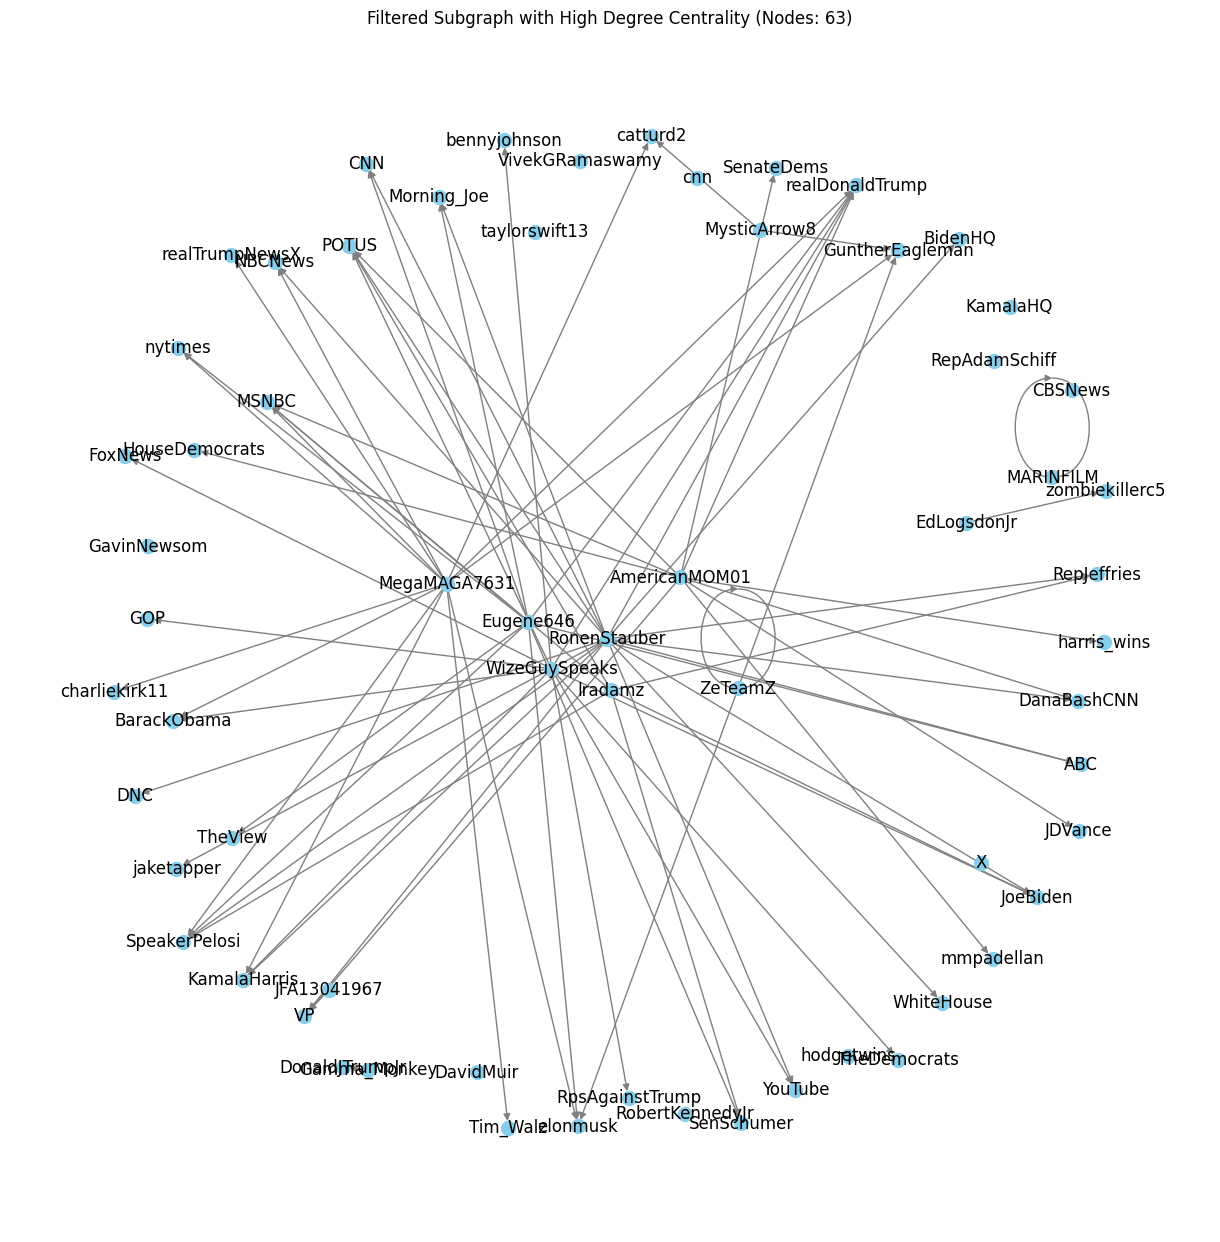

In [29]:
# 计算中心性指标
degree_centrality = nx.degree_centrality(G)

# 设置阈值（如前 0.2% 的高中心性节点）
top_percent = 0.002
threshold = sorted(degree_centrality.values(), reverse=True)[int(len(degree_centrality) * top_percent)]

# 筛选高中心性节点
high_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality >= threshold]
subgraph = G.subgraph(high_centrality_nodes)

# 可视化
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color="skyblue", edge_color="gray")
plt.title(f"Filtered Subgraph with High Degree Centrality (Nodes: {len(subgraph.nodes)})")
plt.show()


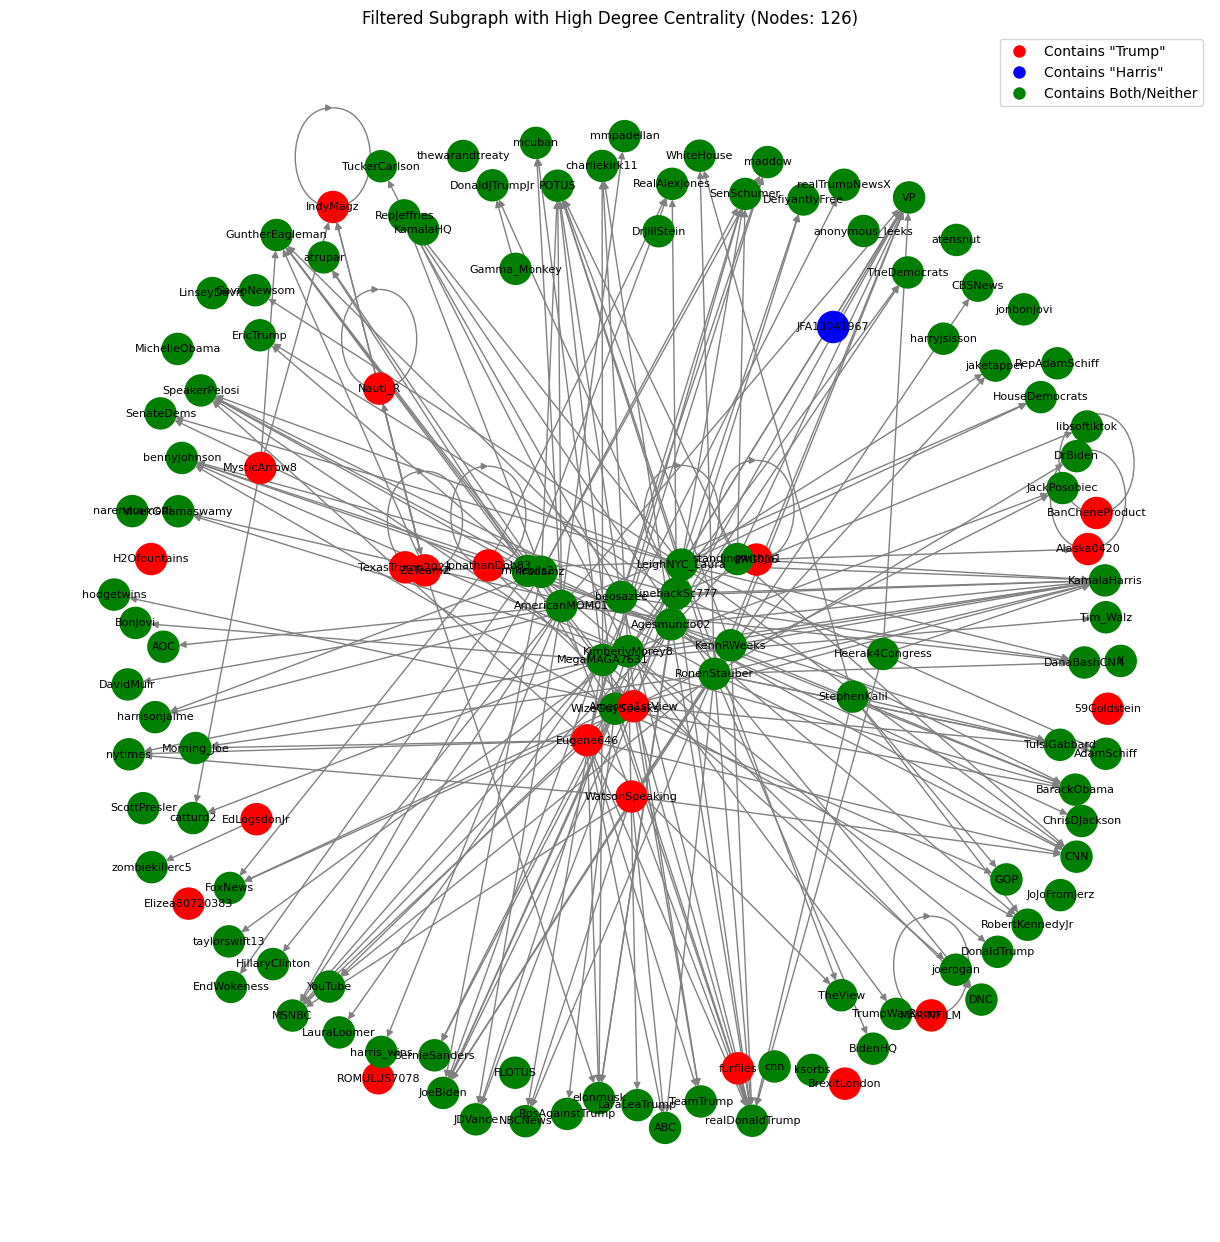

In [83]:
# 节点颜色分类
node_colors = []
for node in subgraph.nodes():
    node_texts = df[df['source_userid'] == node]['text'].tolist()
    contains_trump = any("Trump" in text for text in node_texts)
    contains_harris = any("Harris" in text for text in node_texts)

    if contains_trump and contains_harris:
        node_colors.append("green")  # 同时包含
    elif contains_trump:
        node_colors.append("red")  # 仅包含 Trump
    elif contains_harris:
        node_colors.append("blue")  # 仅包含 Harris
    else:
        node_colors.append("green")  # 都不包含

# 可视化
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)  # 使用 spring 布局
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    edge_color="gray",
    font_size=8,
    font_color="black"
)

# 添加图例
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Contains "Trump"'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Contains "Harris"'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Contains Both/Neither')
    ],
    loc="best"
)

plt.title(f"Filtered Subgraph with High Degree Centrality (Nodes: {len(subgraph.nodes)})")
plt.show()

In [34]:
degree_centrality = nx.degree_centrality(G)

# 设置阈值：保留中心性排名前 1% 的节点
top_percent = 0.002
threshold = sorted(degree_centrality.values(), reverse=True)[int(len(degree_centrality) * top_percent)]

# 筛选高中心性节点
high_centrality_nodes = {node: centrality for node, centrality in degree_centrality.items() if centrality >= threshold}

# 按中心性值排序（从高到低）
sorted_nodes = sorted(high_centrality_nodes.items(), key=lambda x: x[1], reverse=True)

# 打印前 20 个高中心性节点
print("Top 20 High Centrality Nodes:")
for i, (node, centrality) in enumerate(sorted_nodes[:20], 1):
    print(f"{i}. Node ID: {node}, Centrality: {centrality:.4f}")

Top 20 High Centrality Nodes:
1. Node ID: realDonaldTrump, Centrality: 0.0978
2. Node ID: KamalaHarris, Centrality: 0.0540
3. Node ID: JoeBiden, Centrality: 0.0376
4. Node ID: elonmusk, Centrality: 0.0365
5. Node ID: POTUS, Centrality: 0.0262
6. Node ID: CNN, Centrality: 0.0202
7. Node ID: EdLogsdonJr, Centrality: 0.0170
8. Node ID: BarackObama, Centrality: 0.0167
9. Node ID: VP, Centrality: 0.0150
10. Node ID: ABC, Centrality: 0.0116
11. Node ID: YouTube, Centrality: 0.0114
12. Node ID: TheDemocrats, Centrality: 0.0104
13. Node ID: Tim_Walz, Centrality: 0.0094
14. Node ID: MSNBC, Centrality: 0.0078
15. Node ID: RobertKennedyJr, Centrality: 0.0069
16. Node ID: DNC, Centrality: 0.0065
17. Node ID: KamalaHQ, Centrality: 0.0063
18. Node ID: JDVance, Centrality: 0.0063
19. Node ID: DonaldJTrumpJr, Centrality: 0.0061
20. Node ID: FoxNews, Centrality: 0.0059


In [52]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# 添加总交互量属性
df["total_interaction"] = df["retweetCount"] + df["replyCount"] + df["likeCount"]

# 计算度中心性
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, "degree_centrality")







In [54]:
# 转换为 DataFrame 并与原始数据合并
centrality_df = pd.DataFrame.from_dict(degree_centrality, orient="index", columns=["degree_centrality"]).reset_index()
centrality_df.columns = ["source_userid", "degree_centrality"]

# 在合并时使用不同的列名来避免冲突
df = df.merge(centrality_df, on="source_userid", how="left", suffixes=("", "_new"))

# 如果你想替换原有的度中心性列，可以手动更新：
df["degree_centrality"] = df["degree_centrality_new"]
df.drop(columns=["degree_centrality_new"], inplace=True)


Top 10 Influencers in 'Trump' Mentions:
 source_userid                                                                                                                                                                                                                                                                                                                text  total_interaction
DiamondandSilk                                                                                          Democrats sent out a Half Black man to scold Whole Black men about voting for a Black woman who's not even Black. \nLol, you can't make this sheeit up! \n#MassaObama\n#Trump2024\n#DiamondandSilk https://t.co/FvNd2sLfXg              57942
yusnielperez89                                                                                                                            Would you vote for Harris Buttigieg ticket? #HarrisButtigieg2024 #Biden #Biden2024 #bidendroppedout #bidendropsout #maga #Trump2024 #PeteB

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6448\1864552737.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_trump_influencers, x="total_interaction", y="source_userid", palette="Reds", ax=axes[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6448\1864552737.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_harris_influencers, x="total_interaction", y="source_userid", palette="Blues", ax=axes[1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6448\1864552737.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



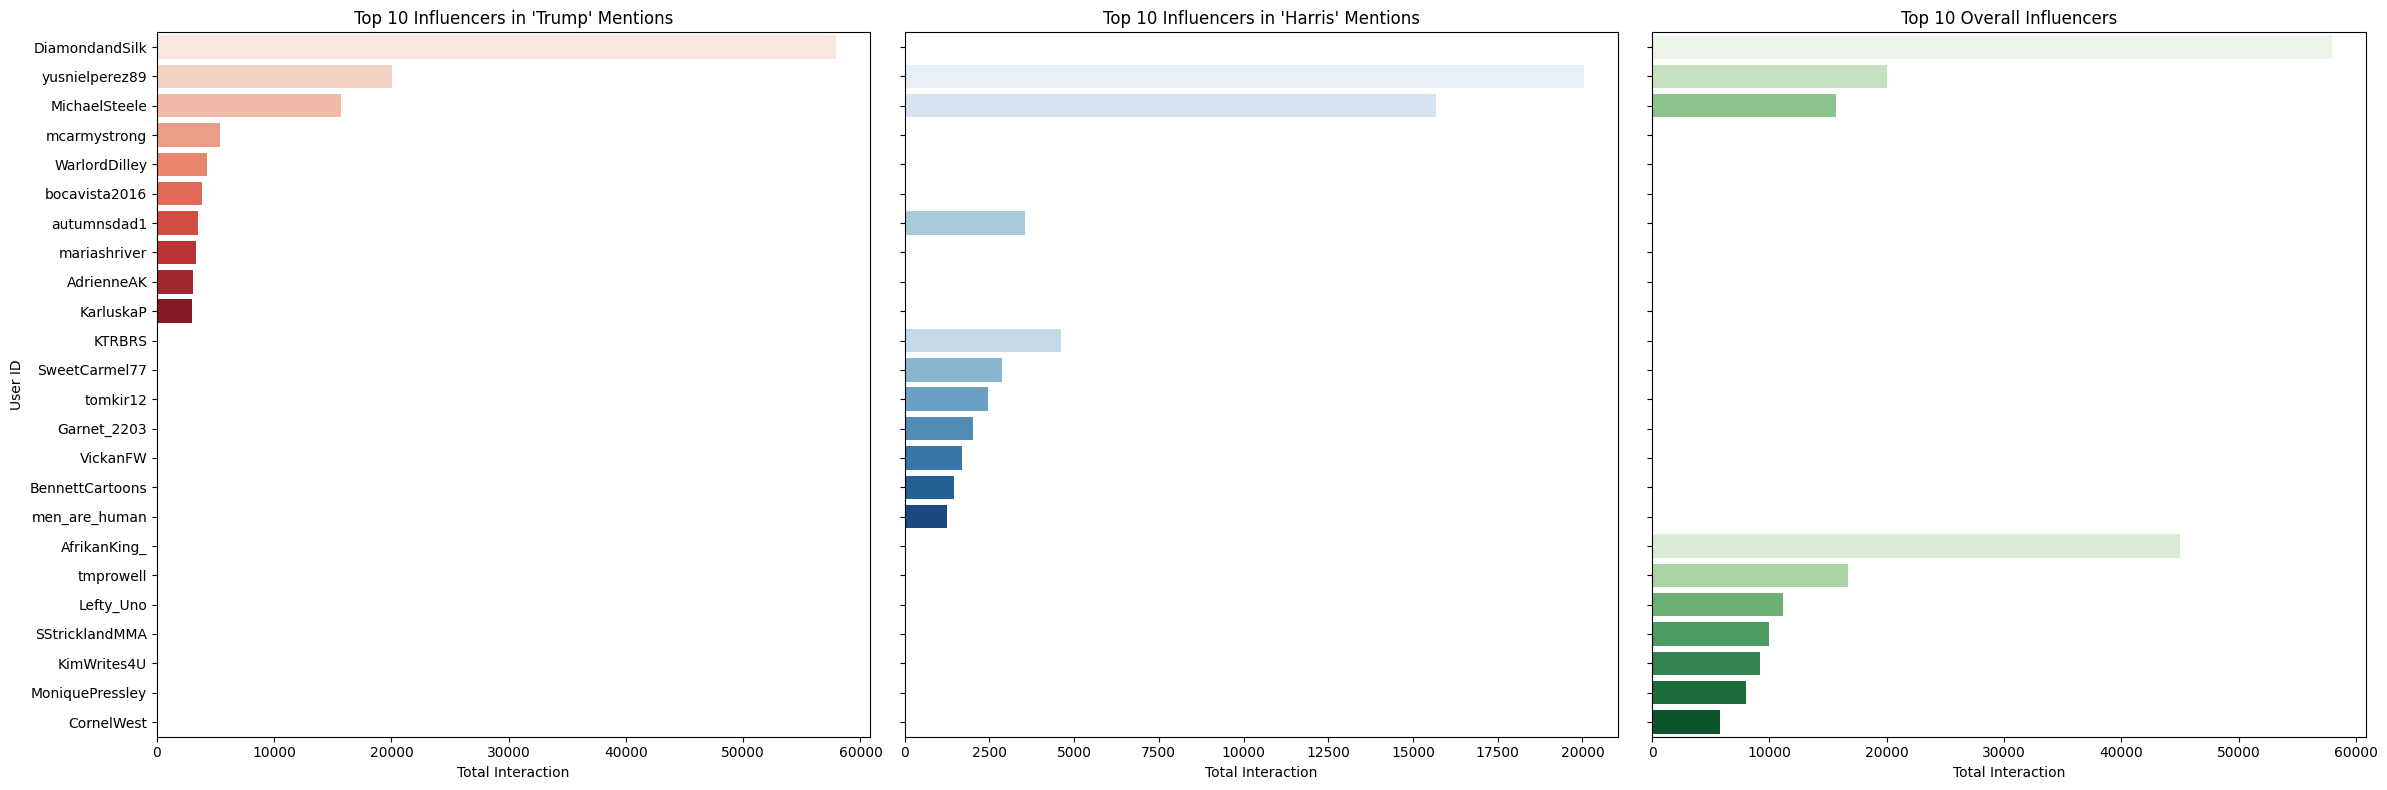

In [87]:
# 添加总交互量列
df["total_interaction"] = df["retweetCount"] + df["replyCount"] + df["likeCount"]

# 筛选包含 "Trump" 的文本
trump_df = df[df["text"].str.contains("Trump", case=False, na=False)]

# 筛选包含 "Harris" 的文本
harris_df = df[df["text"].str.contains("Harris", case=False, na=False)]

# 所有文本（不需要额外筛选）

# 去重并确保每个分组有 10 个唯一 ID
def get_top_influencers(df, column, n=10):
    # 按交互量排序并去重
    unique_df = df.sort_values(by="total_interaction", ascending=False).drop_duplicates(subset=["source_userid"])
    # 确保有 n 条记录
    return unique_df.head(n)[["source_userid", "text", "total_interaction"]]

# 获取前 10 位 influencer（确保唯一）
top_trump_influencers = get_top_influencers(trump_df, "total_interaction")
top_harris_influencers = get_top_influencers(harris_df, "total_interaction")
top_overall_influencers = get_top_influencers(df, "total_interaction")

# 打印结果
print("Top 10 Influencers in 'Trump' Mentions:")
print(top_trump_influencers.to_string(index=False))

print("\nTop 10 Influencers in 'Harris' Mentions:")
print(top_harris_influencers.to_string(index=False))

print("\nTop 10 Overall Influencers:")
print(top_overall_influencers.to_string(index=False))

# 可视化函数
import seaborn as sns
import matplotlib.pyplot as plt

def plot_influencers(data, title, color):
    sns.barplot(data=data, x="total_interaction", y="source_userid", palette=color)
    plt.title(title)
    plt.xlabel("Total Interaction")
    plt.ylabel("User ID")

# 绘制三张子图
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

sns.barplot(data=top_trump_influencers, x="total_interaction", y="source_userid", palette="Reds", ax=axes[0])
axes[0].set_title("Top 10 Influencers in 'Trump' Mentions")
axes[0].set_xlabel("Total Interaction")
axes[0].set_ylabel("User ID")

sns.barplot(data=top_harris_influencers, x="total_interaction", y="source_userid", palette="Blues", ax=axes[1])
axes[1].set_title("Top 10 Influencers in 'Harris' Mentions")
axes[1].set_xlabel("Total Interaction")
axes[1].set_ylabel("")

sns.barplot(data=top_overall_influencers, x="total_interaction", y="source_userid", palette="Greens", ax=axes[2])
axes[2].set_title("Top 10 Overall Influencers")
axes[2].set_xlabel("Total Interaction")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


Top 10 Influencers in 'Trump' Mentions:
        source_userid                                               text  \
57887  DiamondandSilk  Democrats sent out a Half Black man to scold W...   
33311  yusnielperez89  Would you vote for Harris Buttigieg ticket? #H...   
48555   MichaelSteele  .@realDonaldTrump trump is watching how @VP Ha...   
72819    mcarmystrong  Biden lost the debate. Kennedy won. Here's why...   
57891   WarlordDilley  Winning isn't enough.\n\nMAGA needs to send a ...   
47314   bocavista2016  BLACKLASH\n\nBlack man responds to President O...   
33028     autumnsdad1  After watching the debate last night..It’s as ...   
85539    mariashriver  It’s hard to watch this debate with no fact-ch...   
50685      AdrienneAK  In defense of single white women, this one is ...   
57952       KarluskaP  New York Baby! #Trump2024 https://t.co/2IeLZkel1H   

       total_interaction  
57887              57942  
33311              20044  
48555              15670  
72819          

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6448\1990441931.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_trump_influencers, x="total_interaction", y="source_userid", palette="Reds", ax=axes[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6448\1990441931.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_harris_influencers, x="total_interaction", y="source_userid", palette="Blues", ax=axes[1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6448\1990441931.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



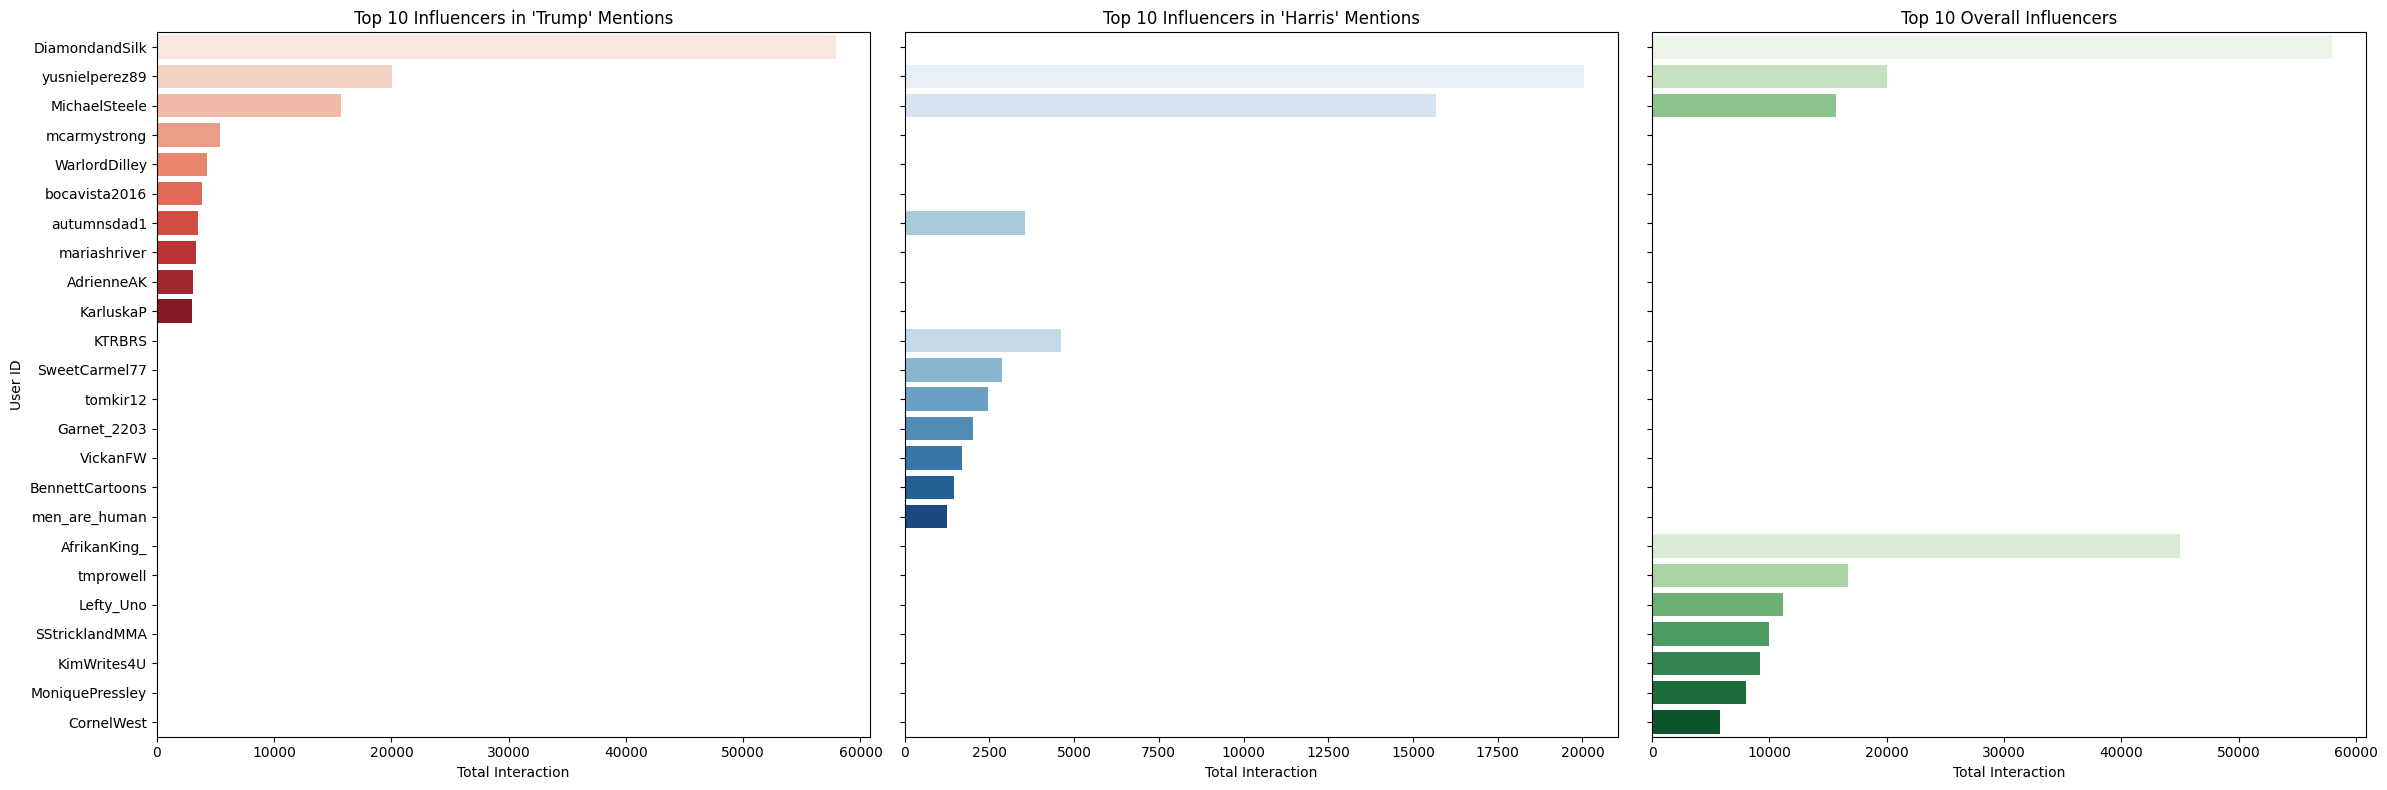

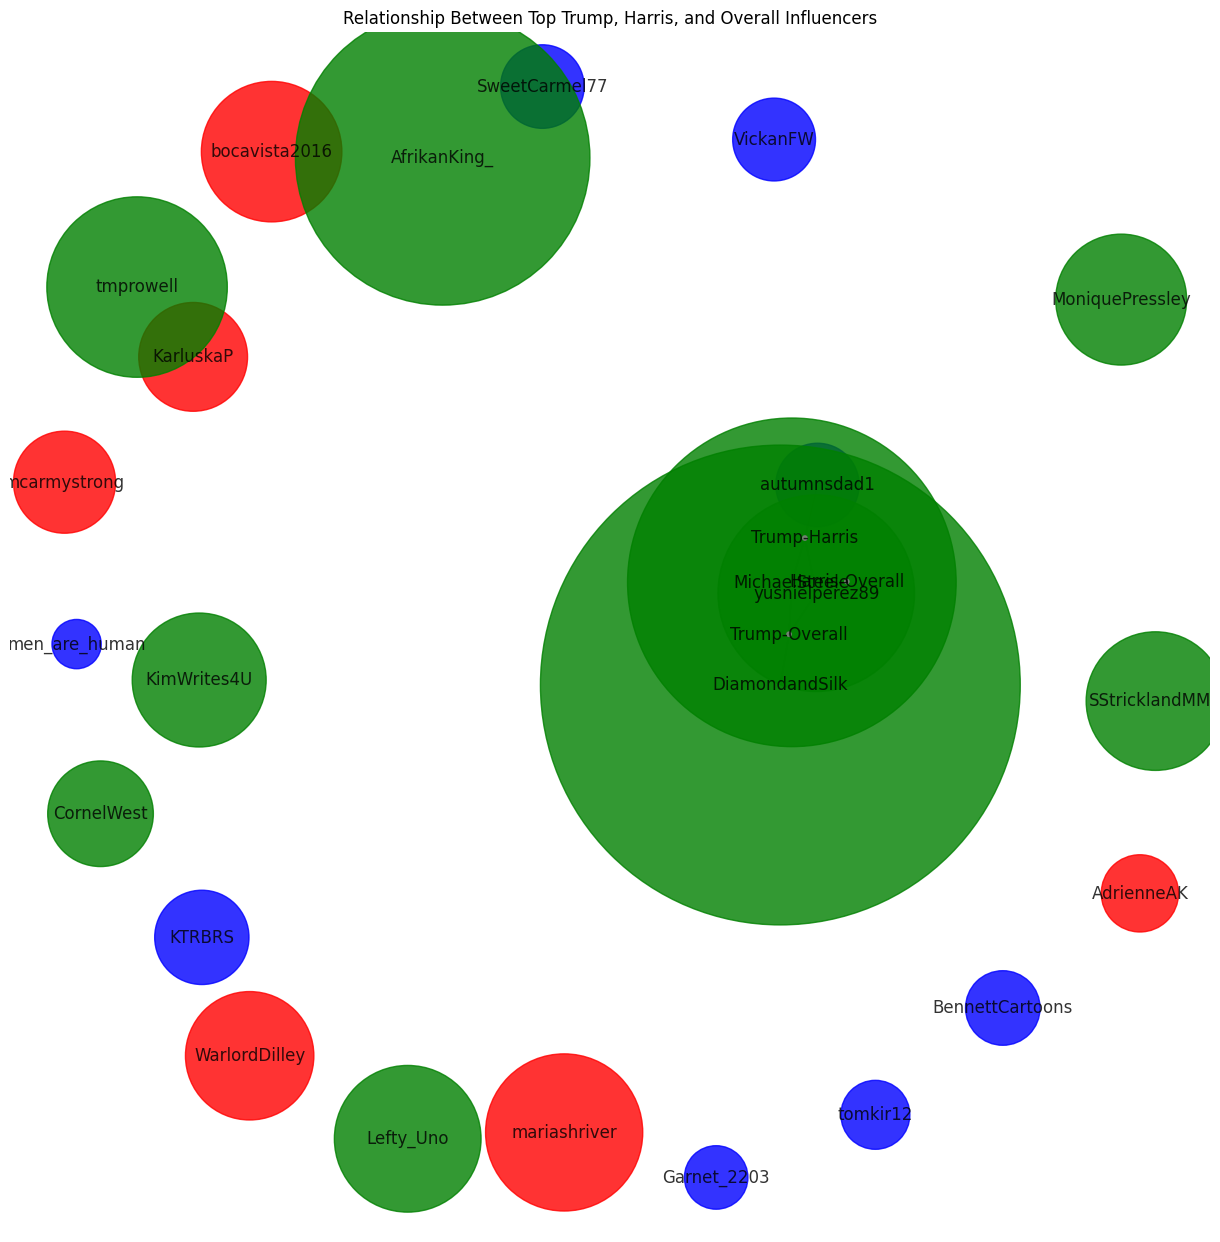

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# 添加总交互量列
df["total_interaction"] = df["retweetCount"] + df["replyCount"] + df["likeCount"]

# 筛选包含 "Trump" 的文本
trump_df = df[df["text"].str.contains("Trump", case=False, na=False)]

# 筛选包含 "Harris" 的文本
harris_df = df[df["text"].str.contains("Harris", case=False, na=False)]

# 获取前 10 位 influencer
def get_top_influencers(df, column, n=10):
    unique_df = df.sort_values(by=column, ascending=False).drop_duplicates(subset=["source_userid"])
    return unique_df.head(n)[["source_userid", "text", "total_interaction"]]

# 获取各类 Top10
top_trump_influencers = get_top_influencers(trump_df, "total_interaction")
top_harris_influencers = get_top_influencers(harris_df, "total_interaction")
top_overall_influencers = get_top_influencers(df, "total_interaction")

# 打印结果
print("Top 10 Influencers in 'Trump' Mentions:")
print(top_trump_influencers)

print("\nTop 10 Influencers in 'Harris' Mentions:")
print(top_harris_influencers)

print("\nTop 10 Overall Influencers:")
print(top_overall_influencers)

# 可视化函数
def plot_influencers(data, title, color):
    sns.barplot(data=data, x="total_interaction", y="source_userid", palette=color)
    plt.title(title)
    plt.xlabel("Total Interaction")
    plt.ylabel("User ID")

# 绘制三张子图
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

sns.barplot(data=top_trump_influencers, x="total_interaction", y="source_userid", palette="Reds", ax=axes[0])
axes[0].set_title("Top 10 Influencers in 'Trump' Mentions")
axes[0].set_xlabel("Total Interaction")
axes[0].set_ylabel("User ID")

sns.barplot(data=top_harris_influencers, x="total_interaction", y="source_userid", palette="Blues", ax=axes[1])
axes[1].set_title("Top 10 Influencers in 'Harris' Mentions")
axes[1].set_xlabel("Total Interaction")
axes[1].set_ylabel("")

sns.barplot(data=top_overall_influencers, x="total_interaction", y="source_userid", palette="Greens", ax=axes[2])
axes[2].set_title("Top 10 Overall Influencers")
axes[2].set_xlabel("Total Interaction")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

# 增加红蓝Top10和总Top10的关系图
# 合并数据
trump_ids = set(top_trump_influencers["source_userid"])
harris_ids = set(top_harris_influencers["source_userid"])
overall_ids = set(top_overall_influencers["source_userid"])

# 构建关系图
G = nx.Graph()

# 添加节点和属性
for user in trump_ids:
    G.add_node(user, group="Trump", interaction=df[df["source_userid"] == user]["total_interaction"].sum())
for user in harris_ids:
    G.add_node(user, group="Harris", interaction=df[df["source_userid"] == user]["total_interaction"].sum())
for user in overall_ids:
    G.add_node(user, group="Overall", interaction=df[df["source_userid"] == user]["total_interaction"].sum())

# 添加边（如果用户同时在两个组中）
for user in trump_ids & harris_ids:
    G.add_edge(user, "Trump-Harris")
for user in trump_ids & overall_ids:
    G.add_edge(user, "Trump-Overall")
for user in harris_ids & overall_ids:
    G.add_edge(user, "Harris-Overall")

# 可视化
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # 使用 spring 布局
colors = {"Trump": "red", "Harris": "blue", "Overall": "green"}

node_colors = [colors[G.nodes[node]["group"]] if "group" in G.nodes[node] else "gray" for node in G.nodes]
node_sizes = [G.nodes[node].get("interaction", 10) * 1 for node in G.nodes]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color="gray",
    alpha=0.8,
)

plt.title("Relationship Between Top Trump, Harris, and Overall Influencers")
plt.show()
